In [20]:
import skimage
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt

In [5]:
image = skimage.io.imread("unhandled_dataset/EGOHAND/CARDS_COURTYARD_B_T/frame_0011.jpg")

In [7]:
image.shape

(720, 1280, 3)

In [10]:
mat = scipy.io.loadmat("unhandled_dataset/EGOHAND/CARDS_COURTYARD_B_T/polygons.mat")

In [31]:
arr = np.array(mat.get("polygons")).flatten()

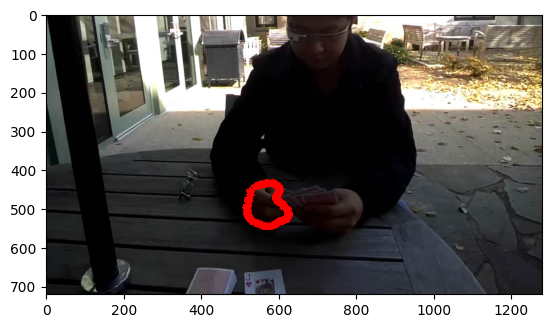

In [81]:
image = skimage.io.imread("unhandled_dataset/EGOHAND/CARDS_COURTYARD_B_T/frame_0011.jpg")
plt.imshow(image)
contour = arr[0][3].T
plt.plot(contour[0], contour[1], "r*-")

In [83]:
contour = arr[0][3].astype(np.int32)
labels = np.zeros_like(image)

labels = cv2.drawContours(labels, [contour], -1, color=(255, 255, 255), thickness=cv2.FILLED);

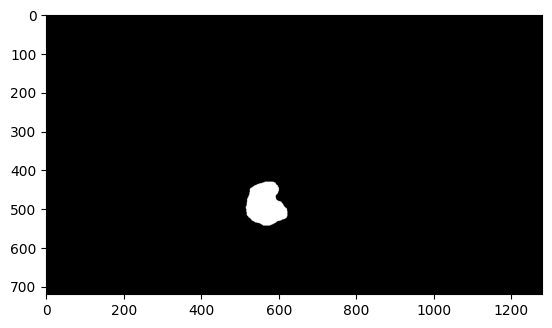

In [84]:
plt.imshow(labels)

In [96]:
import os

images = []
masks = []

root_dir = "unhandled_dataset/EGOHAND/"
for dir in os.listdir(root_dir):
    work_dir = root_dir + dir
    mat = scipy.io.loadmat(work_dir + "/polygons.mat")["polygons"].flatten()

    files = os.listdir(work_dir)[:-1]

    for i in range(len(files)):
        new_image = skimage.io.imread(work_dir + "/" + files[i])
        new_mask = np.zeros_like(new_image)
        for j in range(4):
            new_contour = mat[i][j].astype(np.int32)
            if len(new_contour) > 1:
                cv2.drawContours(new_mask, [new_contour], -1, color=(255, 255, 255), thickness=cv2.FILLED)

        new_image = cv2.resize(new_image, (256, 256), interpolation = cv2.INTER_NEAREST)
        new_mask = cv2.resize(new_mask[:, :, 0], (256, 256), interpolation = cv2.INTER_NEAREST)
        images.append(new_image)
        masks.append(new_mask)

In [98]:
len(images)

4800

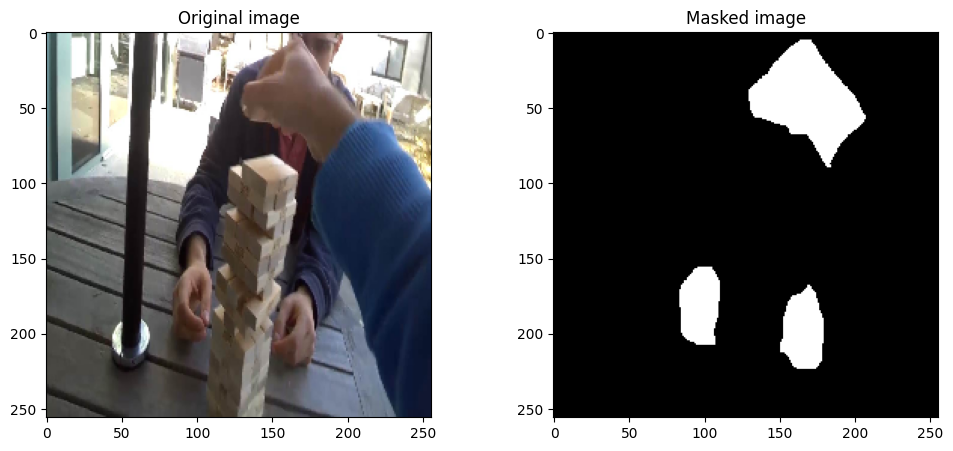

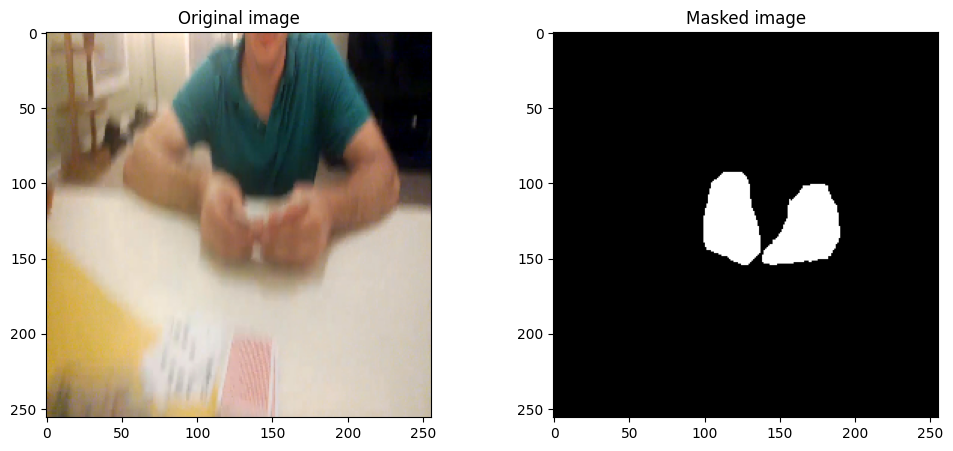

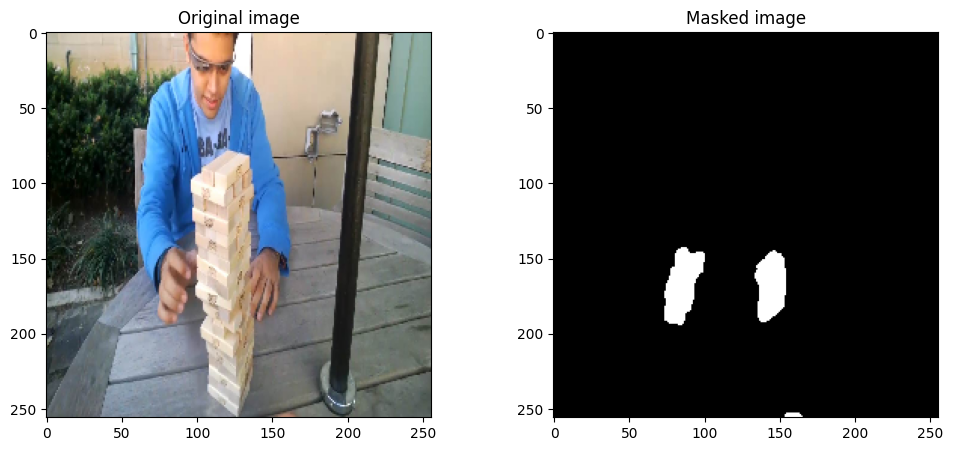

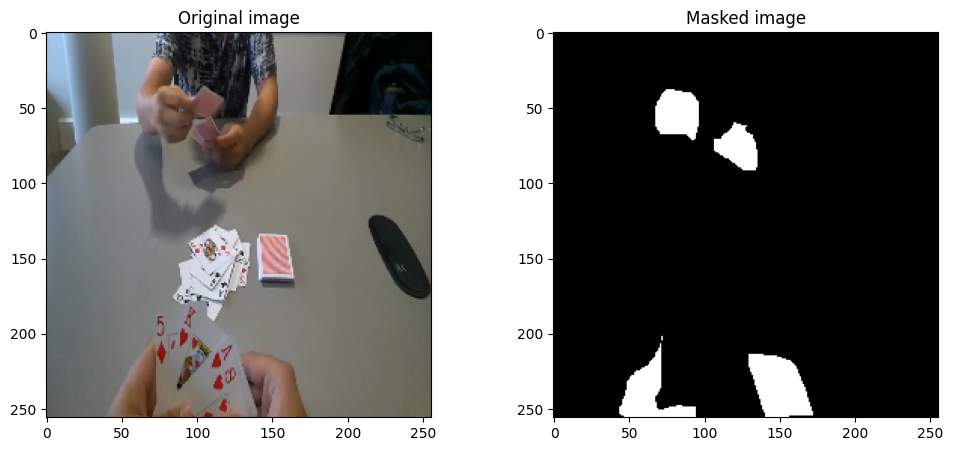

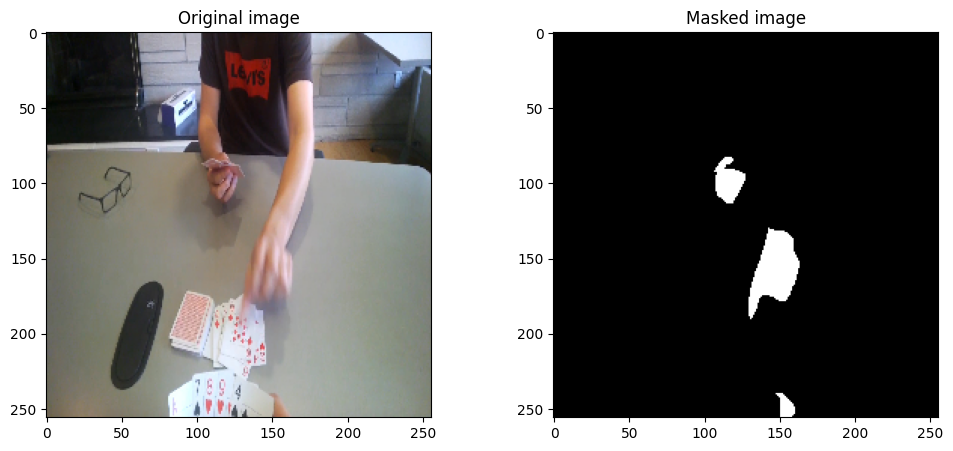

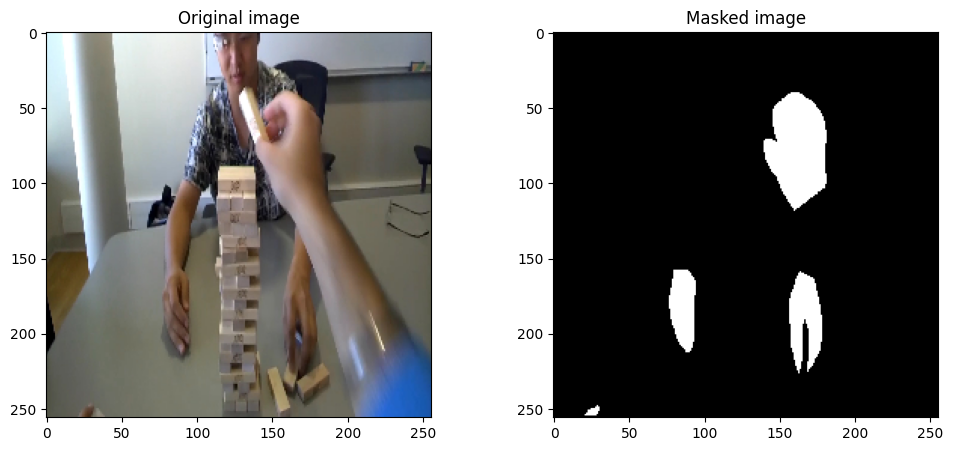

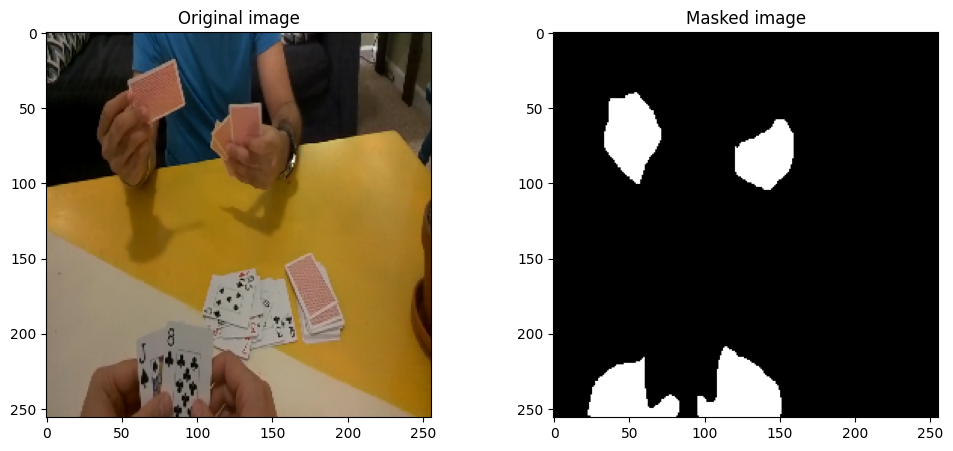

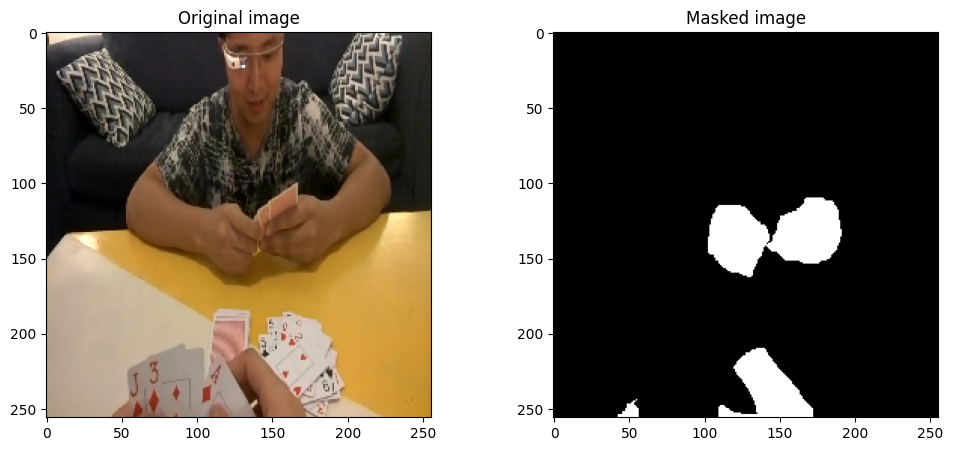

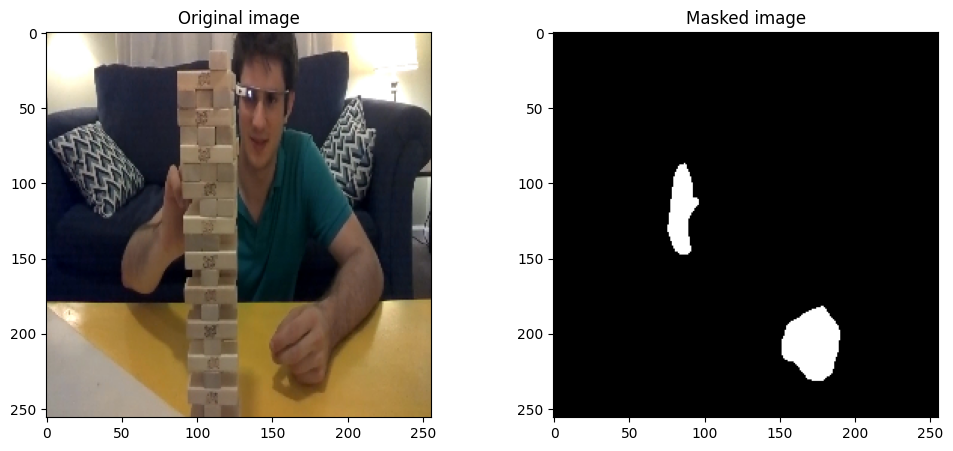

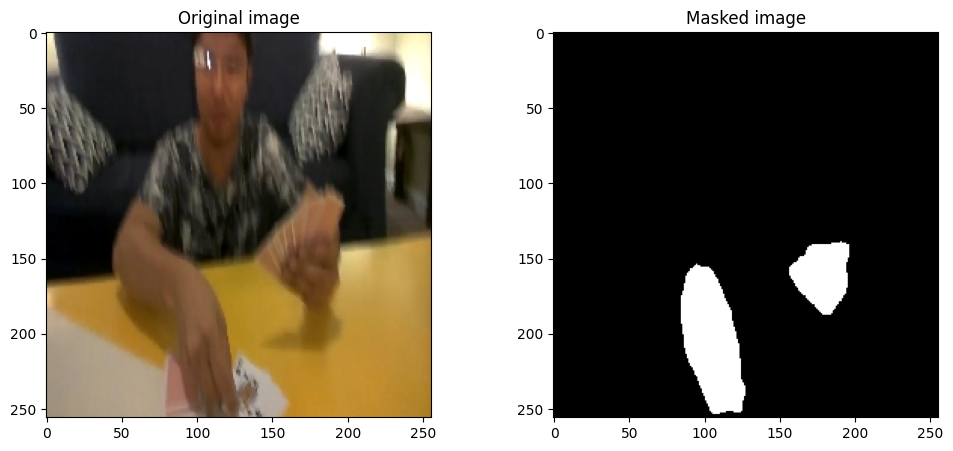

In [102]:
for i in np.random.choice(np.arange(len(images)), 10, replace=False):
    fig, ax = plt.subplots(1, 2, figsize=[12, 5])
    ax[0].imshow(images[i])
    ax[0].set_title("Original image")
    ax[1].imshow(masks[i], cmap="gray")
    ax[1].set_title("Masked image")

    plt.show()


In [ ]:
for i in range(len(images)):
    skimage.io.imsave(f"data/EGOHAND/masks/{i:04}.jpg", masks[i])
    skimage.io.imsave(f"data/EGOHAND/images/{i:04}.jpg", images[i])

Text(0.5, 1.0, 'Masked image')

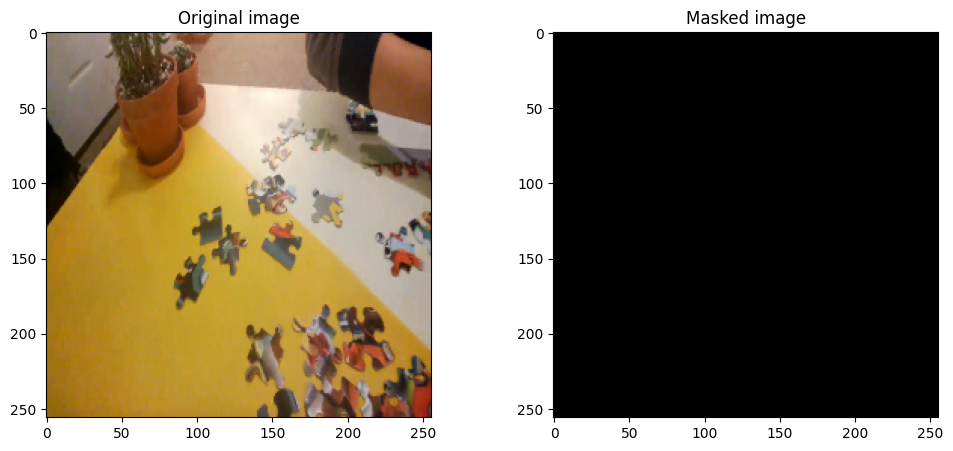

In [104]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
ax[0].imshow(images[4147])
ax[0].set_title("Original image")
ax[1].imshow(masks[4147], cmap="gray")
ax[1].set_title("Masked image")

(405, 720, 3)


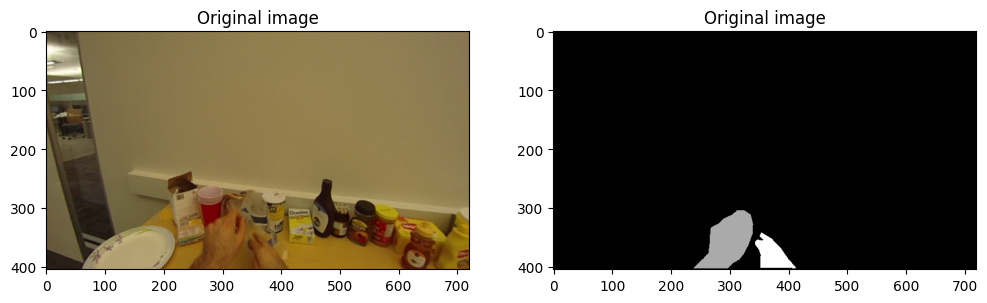

In [109]:
image_dir = "unhandled_dataset/GTEA/Images/"
mask_dir = "unhandled_dataset/GTEA/Masks/"

image = skimage.io.imread("unhandled_dataset/GTEA/Images/s1_cheese_0000000020.jpg")
mask = skimage.io.imread("unhandled_dataset/GTEA/Masks/s1_cheese_0000000020.png")

print(image.shape)
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
ax[0].set_title("Original image")
ax[0].imshow(image)

ax[1].set_title("Original image")
ax[1].imshow(mask, cmap="gray")

plt.show()

In [112]:
images = []
masks = []

image_dir = "unhandled_dataset/GTEA/Images/"
mask_dir = "unhandled_dataset/GTEA/Masks/"


for file in os.listdir(image_dir):
    filename = file[:-4]
    new_image = skimage.io.imread(image_dir + filename + ".jpg")
    new_mask = skimage.io.imread(mask_dir + filename + ".png")

    new_mask[new_mask > 0] = 255

    new_image = cv2.resize(new_image, (256, 256), interpolation = cv2.INTER_NEAREST)
    new_mask = cv2.resize(new_mask, (256, 256), interpolation = cv2.INTER_NEAREST)
    images.append(new_image)
    masks.append(new_mask)

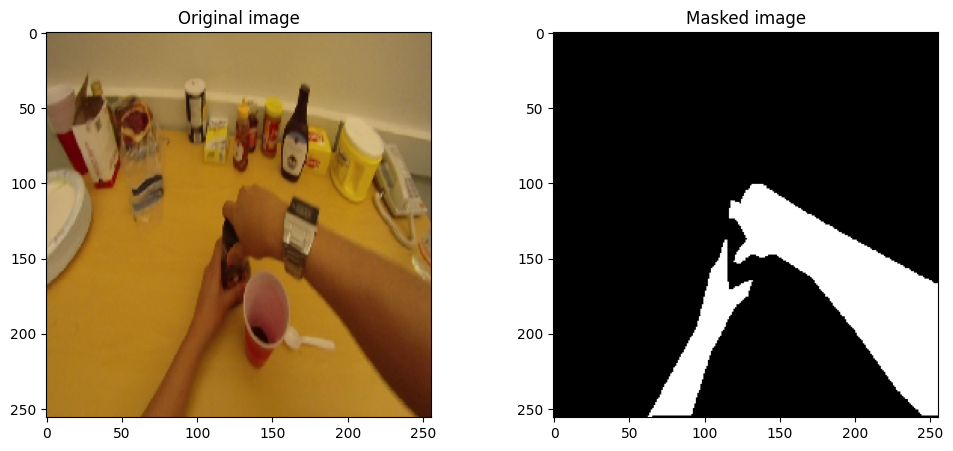

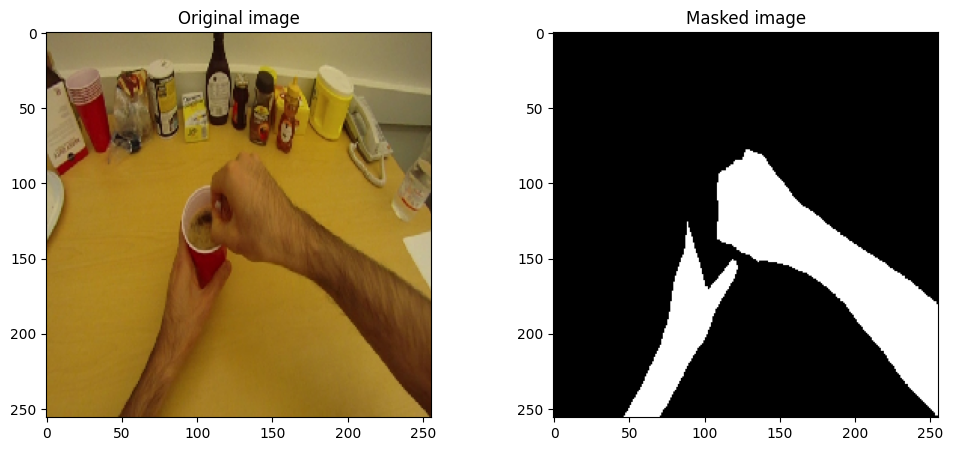

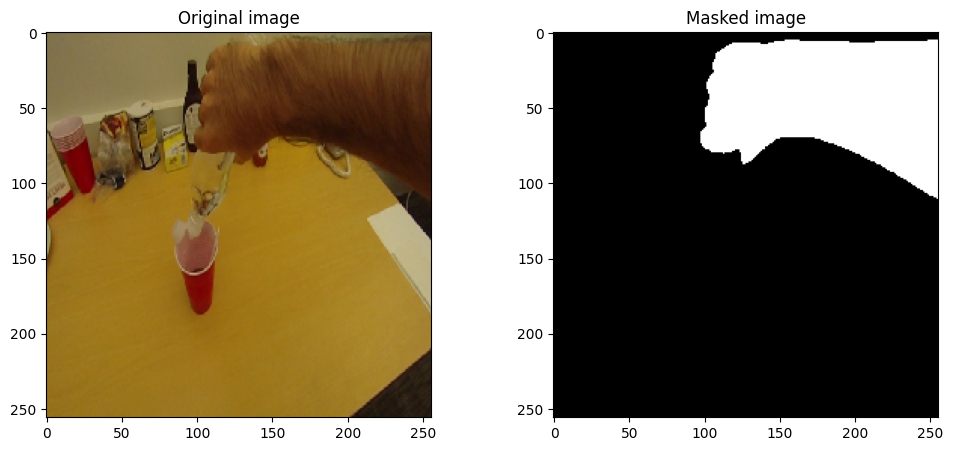

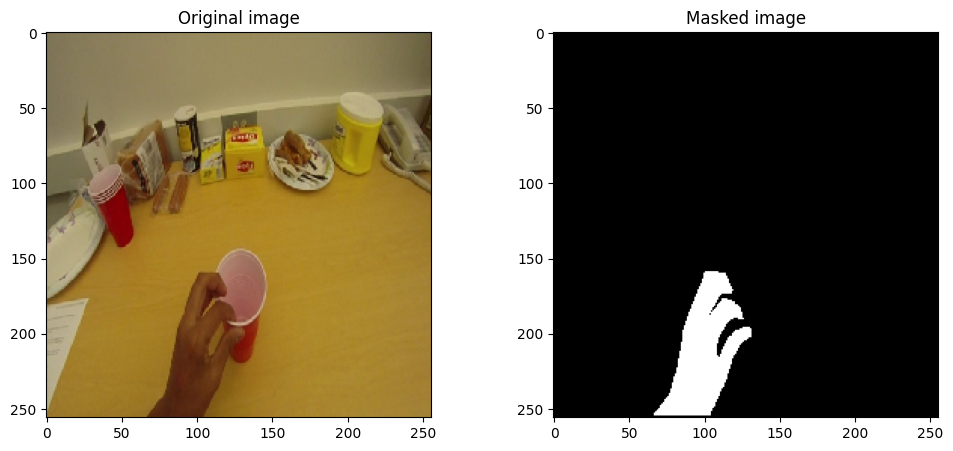

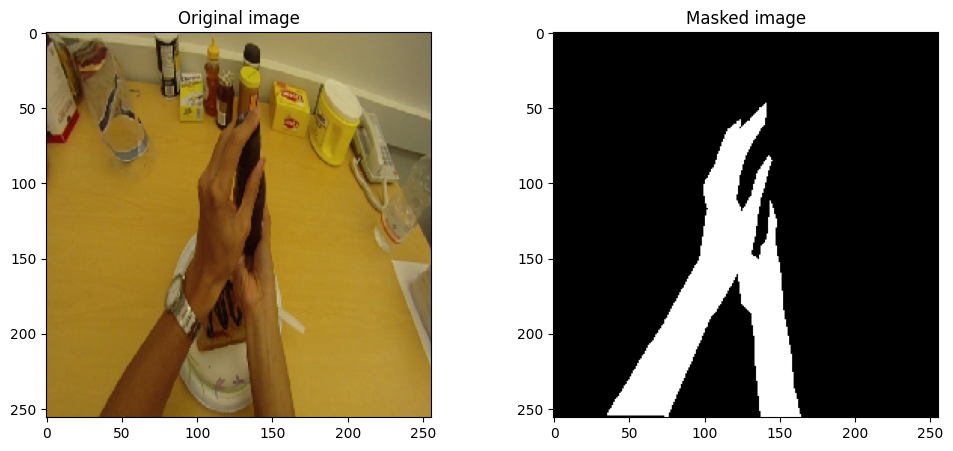

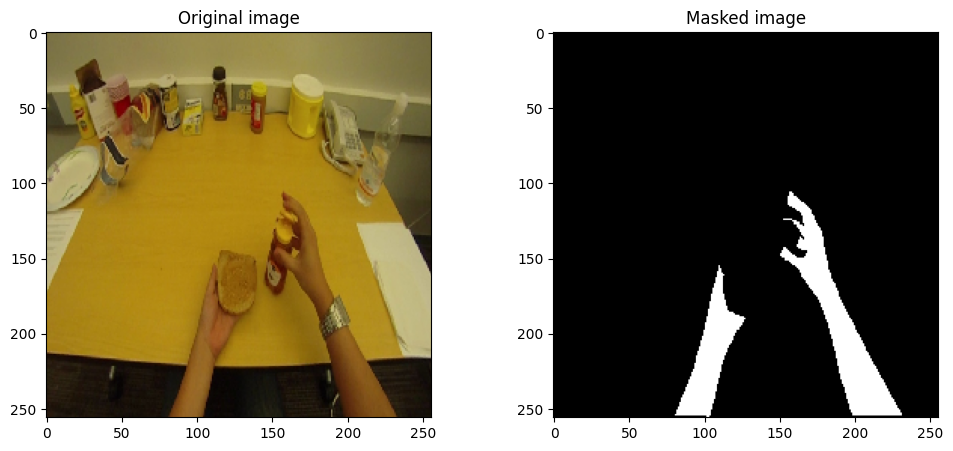

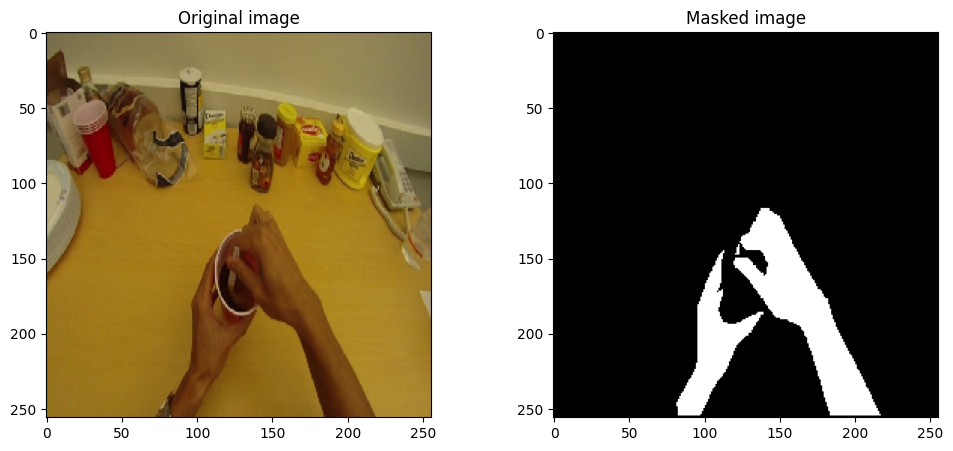

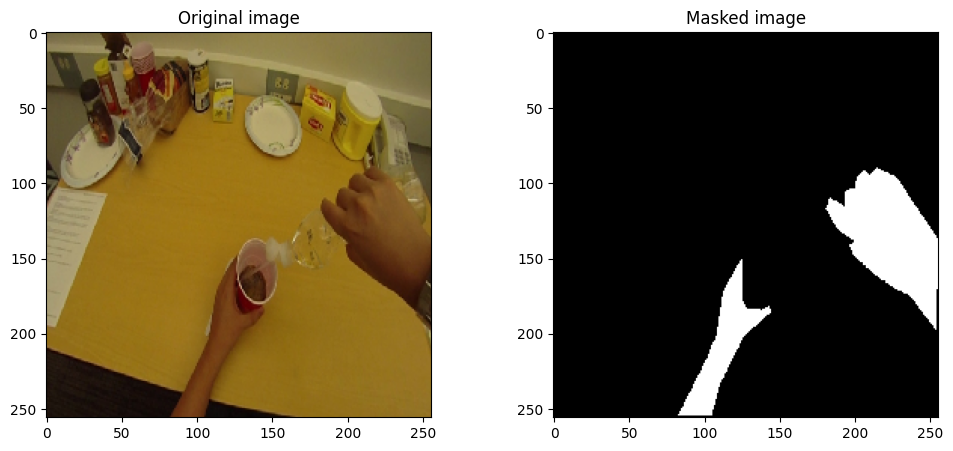

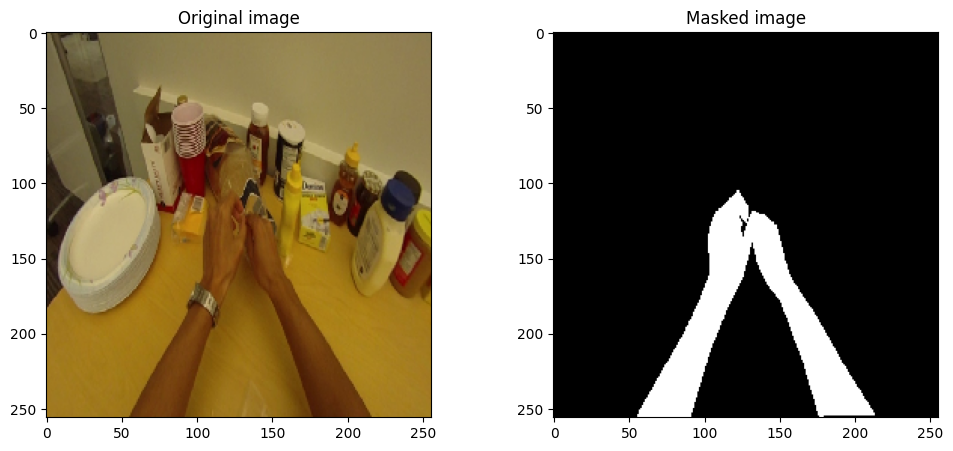

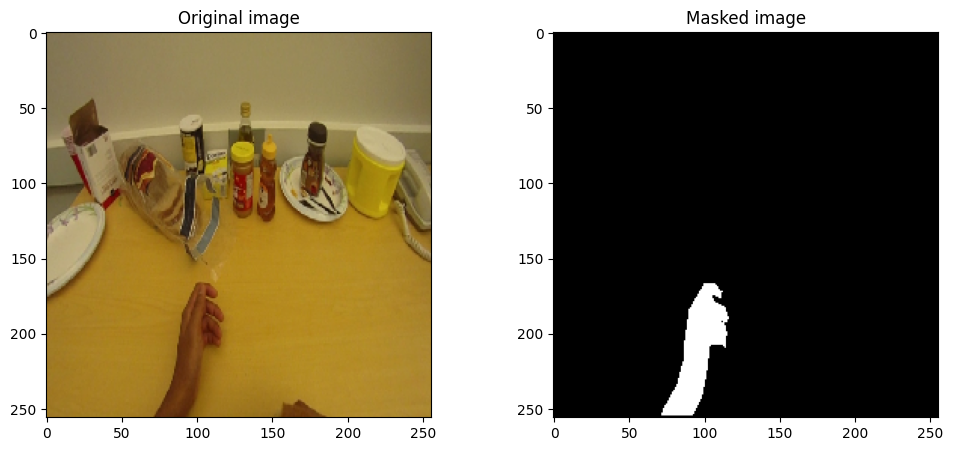

In [113]:
for i in np.random.choice(np.arange(len(images)), 10, replace=False):
    fig, ax = plt.subplots(1, 2, figsize=[12, 5])
    ax[0].imshow(images[i])
    ax[0].set_title("Original image")
    ax[1].imshow(masks[i], cmap="gray")
    ax[1].set_title("Masked image")

    plt.show()

In [ ]:
for i in range(len(images)):
    skimage.io.imsave(f"data/GTEA/masks/{i:04}.jpg", masks[i])
    skimage.io.imsave(f"data/GTEA/images/{i:04}.jpg", images[i])

Text(0.5, 1.0, 'Masked image')

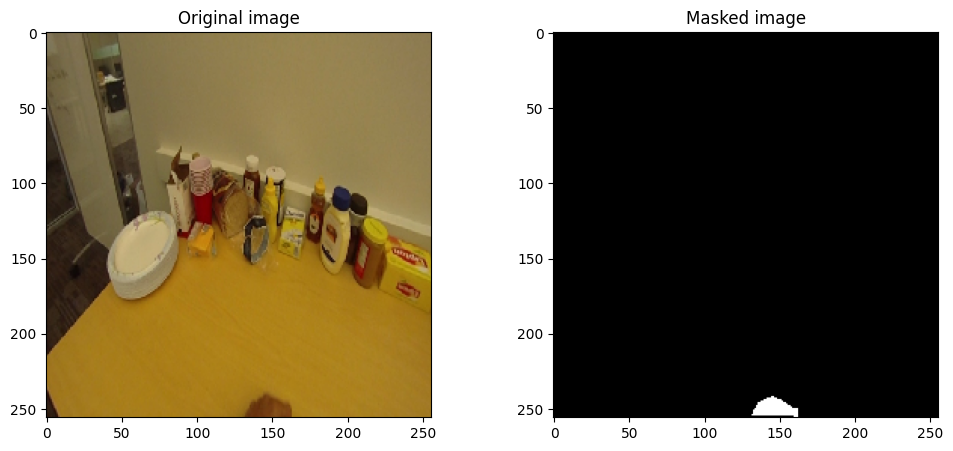

In [117]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
ax[0].imshow(images[499])
ax[0].set_title("Original image")
ax[1].imshow(masks[499], cmap="gray")
ax[1].set_title("Masked image")